Week3- Homework 2: Data Preprocessing

Humza Humayun

In [4]:
#1. Data Understanding and Summary:
#● Question: Summarize and describe the data type of each variable.
import pandas as pd

climate_in=pd.read_csv("ClimateData.csv")
climate_types=pd.DataFrame(climate_in.dtypes)
climate_types

,0
id,int64
building_class,object
floor_area,float64
year_built,float64
precipitation_inches,float64
snowfall_inches,float64
avg_temp,float64
days_with_fog,float64
site_eui,float64


In [5]:
#2. Unique Values Analysis:
#● Question: For the categorical variable in the dataset, identify the number of unique values.

#catergorical variables identified: building_class
climate_in["building_class"].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [6]:
#3. Descriptive Statistics:
#● Question: Examine and summarize the descriptive statistics for the dataset. 
#What insights can you gain about the central tendency and dispersion of each variable?

for col in climate_in.select_dtypes(include=['number']):
    print(f"Stats for {col}:\nMean:{climate_in[col].mean()}\nMedian:{climate_in[col].median()}\nVariance:{climate_in[col].var()}\nSD:{climate_in[col].std()}\n")

Stats for id:
Mean:37878.0
Median:37878.0
Variance:478266567.1666667
SD:21869.306508590224

Stats for floor_area:
Mean:165983.86585794055
Median:91367.0
Variance:60947656152.193306
SD:246875.790939884

Stats for year_built:
Mean:1952.306764069264
Median:1951.0
Variance:1372.9706816645971
SD:37.053619009006354

Stats for precipitation_inches:
Mean:42.43065116094883
Median:42.17
Variance:112.19480008155433
SD:10.592204684651554

Stats for snowfall_inches:
Mean:29.136379476484024
Median:31.6
Variance:317.22794205294383
SD:17.81089391504379

Stats for avg_temp:
Mean:56.17670472471666
Median:56.83561644
Variance:5.026293425492041
SD:2.2419396569693935

Stats for days_with_fog:
Mean:109.14205133340009
Median:104.0
Variance:2570.4647339627854
SD:50.69975082742306

Stats for site_eui:
Mean:82.5847071557744
Median:75.29
Variance:3393.6931234968615
SD:58.25541282573544



In [16]:
#4. Missing Values Assessment:
#● Question: Assess the dataset for missing values. 
#Quantify the extent of missingness in each column. How might these missing values affect your analysis?

missing_entries=climate_in.isnull()
missing_entries

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
75752,False,False,False,False,False,False,False,True,False
75753,False,False,False,False,False,False,False,True,False
75754,False,False,False,False,False,False,False,True,False
75755,False,False,False,False,False,False,False,True,False


In [18]:
missing_entries2=climate_in.isnull().sum()
missing_entries2

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

There are two variables with missing quantities; year_built and days_with_fog. The former category has a miniscule amount of missing values compared to the latter, which is a near 60.451% of the total amount of entries. This is very problematic as we're missing a great sum of values and that has a greater effect on the dataset.  

In [2]:
#5. Missing Data Handling:
#● Question: Based on your assessment of missing values, choose appropriate techniques to handle them. 
#Would you opt for imputation or removal? Justify your choice.

For the year_built variables, a simple imputation will be suffucient as there is a low amount of blanks and that the rest of the data present in this category can sufficiently provide a statistical basis for imputing in values. On the other hand, with the days_with_fog category, the great sum of missing values is so significant that there is no choice but to completely delete the column altogether. Unless you are to magically get those values back, there is no feasible way to work with it. 

In [28]:
#6. Duplicate Records:
#● Question: Identify and quantify any duplicate records in the dataset. 
#What method will you use to eliminate these duplicates, and why?

dupes=climate_in[climate_in.duplicated()]
dupes

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui


In this analysis, no full row duplicates were detected (cross checked using excel as well). If there were any duplicates, those of which were complete copies of an original row, I would do so by creating a seperate DataFrame and then applying the detection script and then completely deleting the duplicate rows.

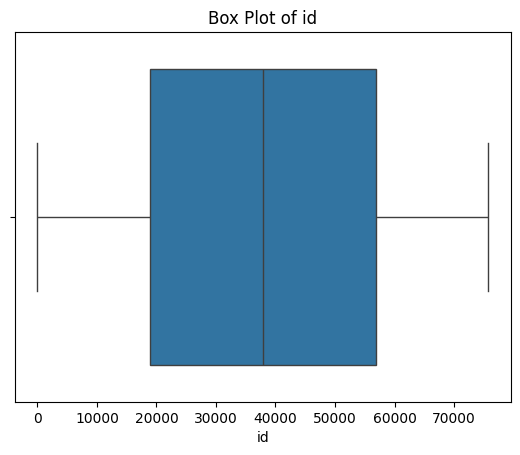

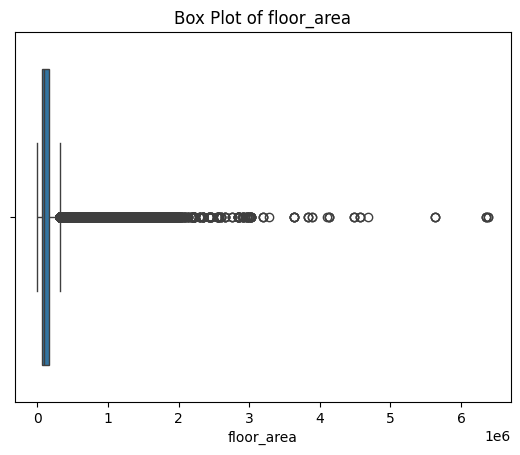

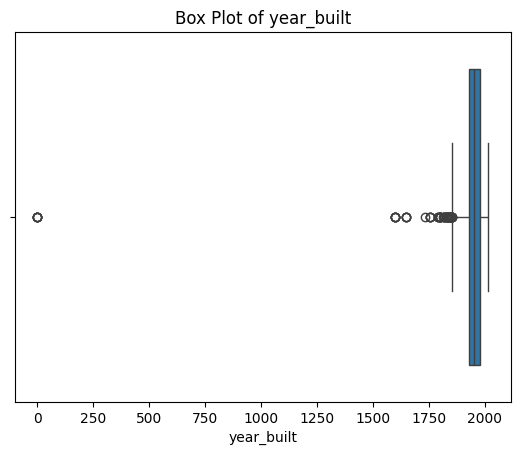

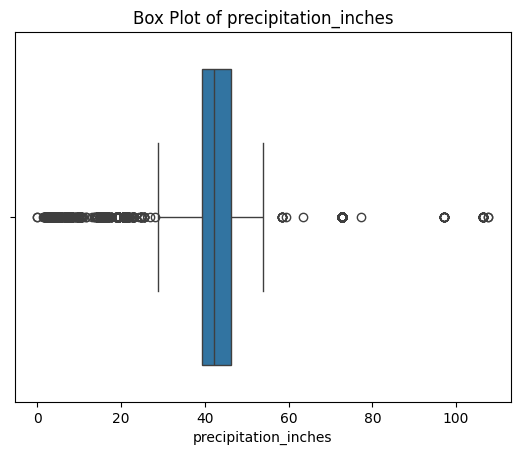

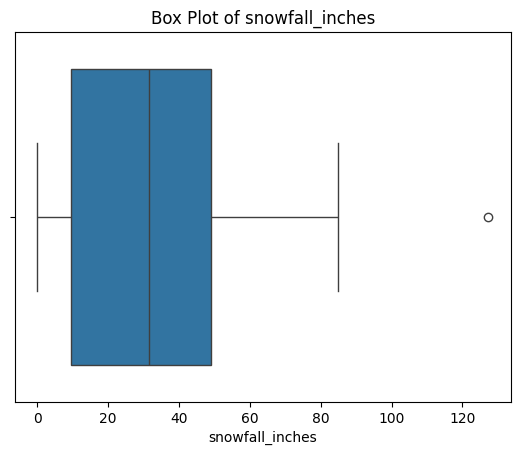

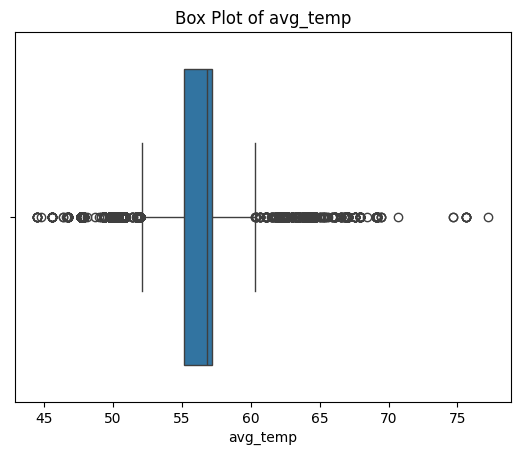

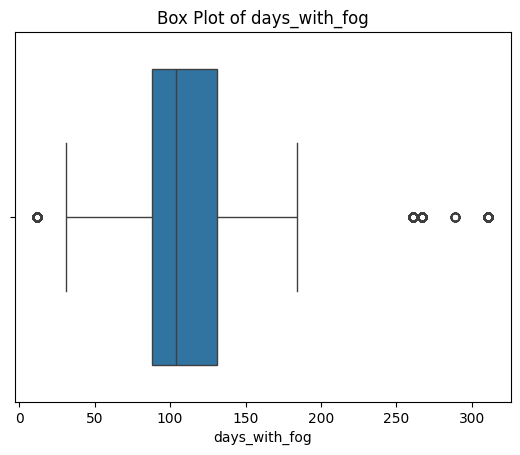

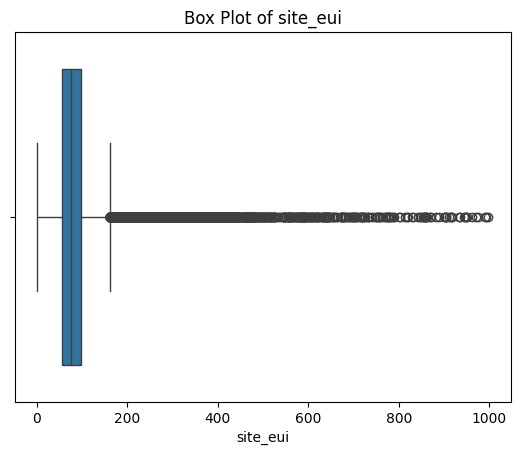

In [29]:
#7. Outlier Detection with Boxplots:
#● Question: Create boxplots for each variable to visually identify outliers. 
#How will the presence of outliers impact your analysis and how do you plan to address them?

import matplotlib.pyplot as plt
import seaborn as sns

for col in climate_in.select_dtypes(include=['number']).columns:
    sns.boxplot(x=climate_in[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

Outliers add variation to the dataset that often add a unfair bias to the overall statistical trends of the analysis of the data. This can manifest as skewing, misshapen central tendancy, and incorrect measurements of the individual mean, median, and variation computations. 

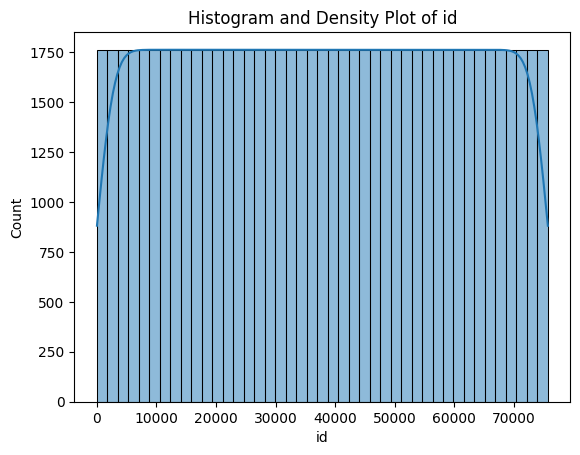

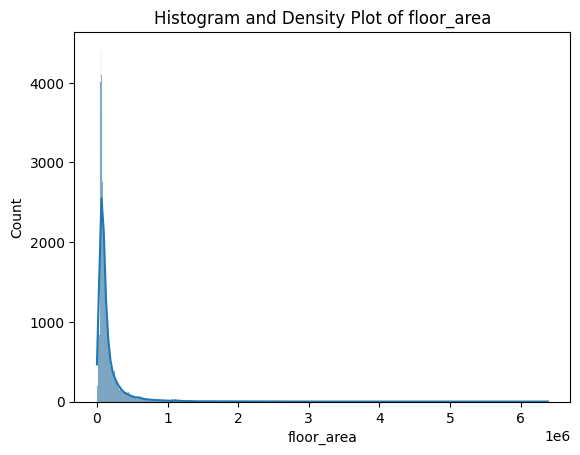

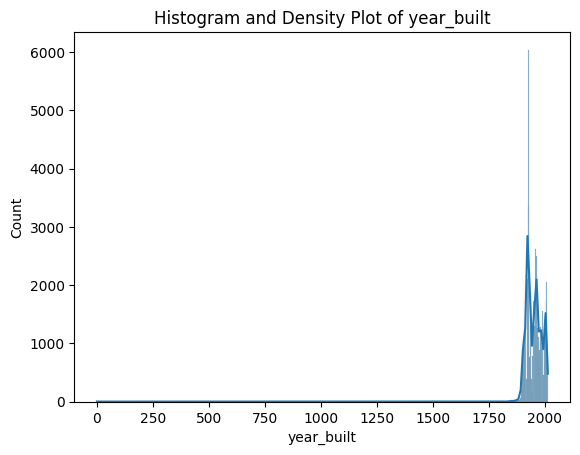

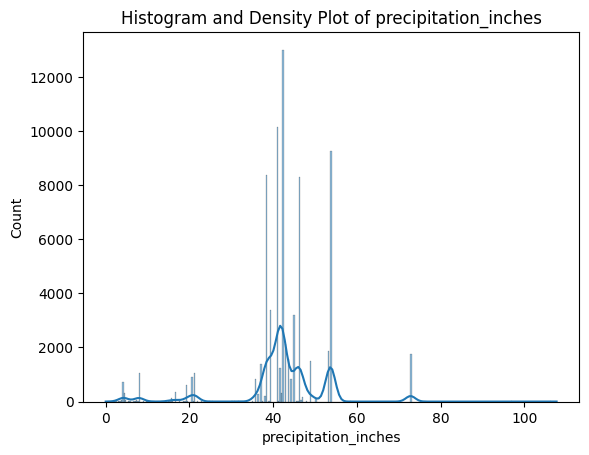

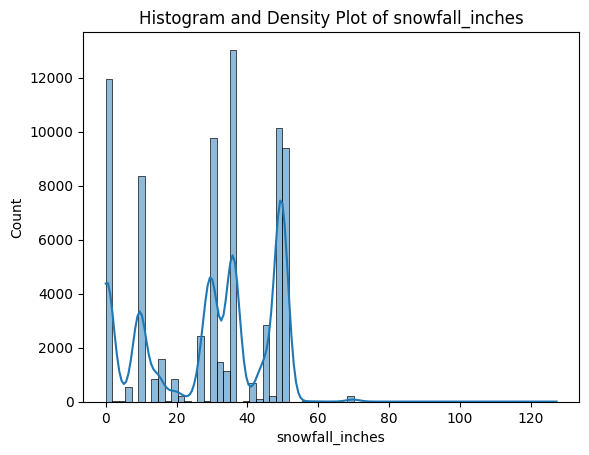

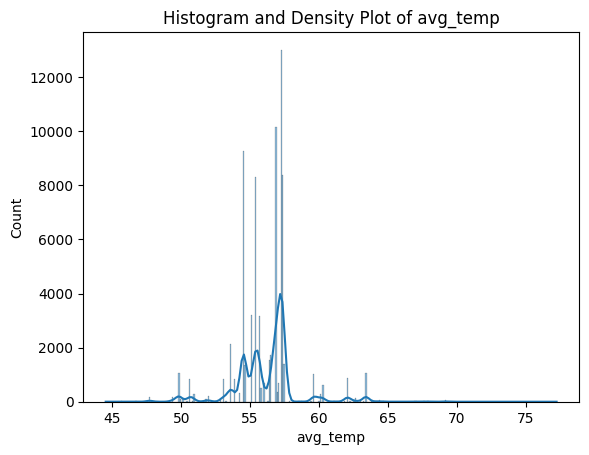

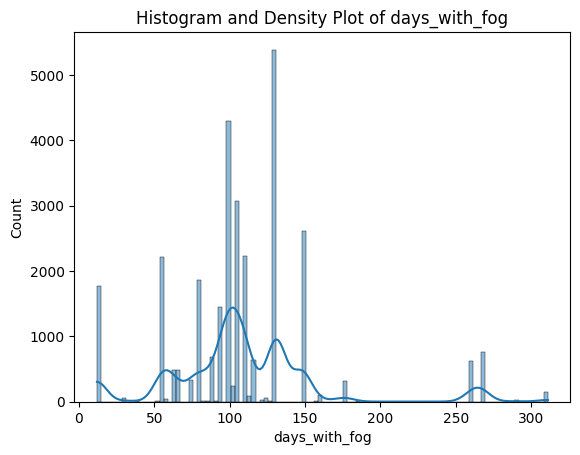

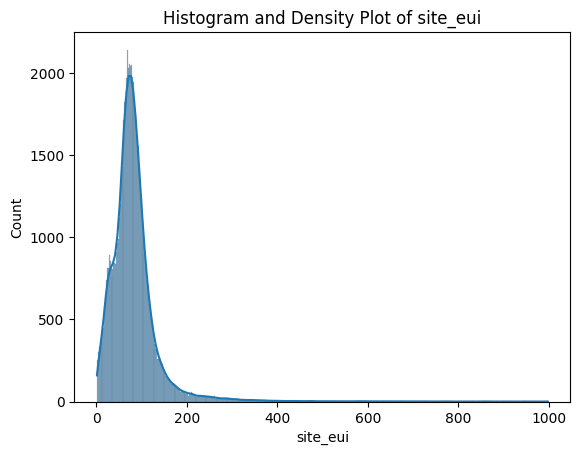

In [30]:
#8. Histogram Analysis for Distribution:
#● Question: Generate histograms for each variable to examine their distributions. 
#Are there any noticeable patterns or outliers? How does the distribution shape affect your preprocessing steps?

for col in climate_in.select_dtypes(include=['number']).columns:
    sns.histplot(climate_in[col],kde=True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

In [ ]:
#9. Feature Scaling:
#● Question: Do you need feature scaling in this dataset? Explain why

Feature scaling is necessary with this dataset as there exists a variable that has so much mising data that the analysis of this dataset with be irrevocably damaged if it were to be included. days_with_fog , as stated earlier, has bearing on almost 65 percent of the data presented here and of that percentage, all the values for days_with_fog are missing. It cannot be simply imputed with the remaining present data as there is such little data to form values to impute into the dataset. 

In [42]:
#10. Outlier Detection with Z-score:
#● Question: Use the Z-score method to detect outliers in the dataset.
#How will you decide which outliers to handle and what strategies will you employ?

from scipy import stats

for col in climate_in.select_dtypes(include=['number']):
    z_scores = stats.zscore(climate_in[col])
    #print(z_scores)
    threshold = 2.5
    
    outliers = climate_in[abs(z_scores) > threshold]
    
    print(f"Outliers in {col}: ")
    print(outliers)
    print("\n")

Outliers in id: 
Empty DataFrame
Columns: [id, building_class, floor_area, year_built, precipitation_inches, snowfall_inches, avg_temp, days_with_fog, site_eui]
Index: []


Outliers in floor_area: 
          id building_class  floor_area  year_built  precipitation_inches  \
56        56     Commercial   1011213.0      1920.0                 16.59   
93        93     Commercial   1500000.0      1989.0                 16.59   
95        95     Commercial    937770.0      1990.0                 16.59   
108      108     Commercial   1325000.0      1979.0                 16.59   
124      124     Commercial    912400.0      1946.0                 16.59   
...      ...            ...         ...         ...                   ...   
73654  73654    Residential    970647.0      2000.0                 45.03   
73683  73683    Residential    962428.0      2009.0                 45.03   
73729  73729     Commercial   1765970.0      1994.0                 45.03   
73775  73775     Commercial   22

If the outliers detected are far from the threshold to such an extent that it is greater than a simple standard deviation, then they must be deleted; although this may end up adding unintentional bias. There is also the matter of the massive amount of missing values in the fog category as well; which with feature scaling, will help clarify the dataset. Perhaps normalizing the data would be helpful as to assemble everything into a logical and assorted manner but then there are also the options of Winsorization and another way of adjusting the distribution of it.

In [43]:
#11. Range Analysis:
#● Question: Identify the maximum and minimum values for each variable. 
#How do these ranges inform your preprocessing and analysis
climate_in.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


Knowing our range for each variable present in the dataset is advantageous as it sets a precedent in understanding the overal distribution of our values and adds a preliminary look into how har outliers can go. Not only that but if this check is performed on raw data that has not been fully preprocessed, you can look for potential errors such as negative low bounds where it is not possible. 

In [47]:
#12. Encoding Categorical Variables:
#● Question: Encode the categorical variable. Which method do you find most suitable for your dataset and why?

building_codes = {"building_class": {"Residential": 1,"Commercial": 2}}
encoded_df=climate_in.replace(building_codes)
encoded_df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,2,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,2,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,2,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,2,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,2,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


I used label encoding as it provides a less intrusive and far superior means of quickly assigning numerical attributes to non-numerical data. I did not want an increase in dimensionality so one-hot encoding was quickly dismissed as unhelpful.